# Bonus Analysis

### Import Dependncies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import db_name
from config import host
from config import port
from config import username
from config import password


### Build connection to database

In [2]:
engine = create_engine(f'postgresql://{username}:{password}@{host}:{port}/{db_name}')
connection = engine.connect()

### Build DataFrame from queried data

In [3]:
salary_title_df = pd.read_sql(
    'SELECT e.emp_no, t.title, s.salary FROM title t JOIN employee e ON t.title_id=e.emp_title_id JOIN salary s ON e.emp_no = s. emp_no;',
    connection
)

## Histogram of Salaries

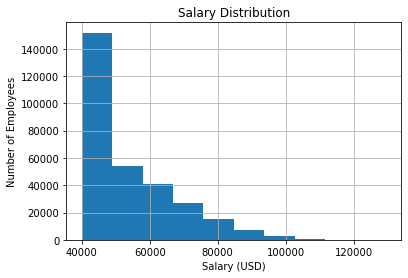

In [4]:
salary_title_df.hist(column = 'salary')
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Number of Employees')
plt.savefig("salary_distribution.png")
plt.show()

## Bar Chart of Average Salary by Title

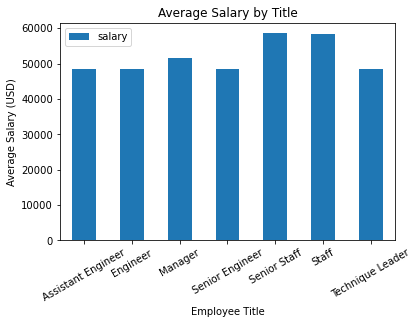

In [5]:
salary_title_df[['title', 'salary']].groupby('title').mean().plot(kind='bar')
plt.title('Average Salary by Title')
plt.xlabel('Employee Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=30)
plt.savefig("salary_average.png")
plt.show()